In [1]:
!pip install openai==
!pip install langchain==
!pip install tiktoken
!pip install wikipedia
!pip install pypdf
!pip install faiss-cpu
!pip install pinecone-client

     ---------------------------------------- 57.3/57.3 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for openai: filename=openai-0.27.1-py3-none-any.whl size=70128 sha256=ff313a7101651b0e936160f31f643d7b9bd5a6e8916267ed6121b8416927d4c5
  Stored in directory: c:\users\28263\appdata\local\pip\cache\wheels\41\c8\4f\138501f9183f9d73c64387828c0a876edf0b330f8d1da3fca7
Successfully built openai
  Attempting uninstall: openai
    Found existing installation: openai 1.8.0
    Uninstalling openai-1.8.0:
      Successfully uninstalled openai-1.8.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-openai 0.0.2.post1 requires openai<2.0.0,>=1.6.1, but you have openai 0.27.1 which is incompatible.


     -------------------------------------- 939.3/939.3 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: langchain
    Found existing installation: langchain 0.1.1
    Uninstalling langchain-0.1.1:
      Successfully uninstalled langchain-0.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langserve 0.0.39 requires langchain>=0.0.333, but you have langchain 0.0.184 which is incompatible.


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11707 sha256=00aed773b09e27594e0d549b6b1e8bc87986d89cafdaf824acfe78d0451e824e
  Stored in directory: c:\users\28263\appdata\local\pip\cache\wheels\b2\7f\26\524faff9145e274da278dc97d63ab0bfde1f791ecf101a9c95
Successfully built wikipedia
     ---------------------------------------- 14.5/14.5 MB 7.2 MB/s eta 0:00:00


In [17]:
# Basics
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# LangChain Training
# LLM
from langchain.llms import OpenAI

# Document Loader
from langchain.document_loaders import PyPDFLoader 

# Splitter
from langchain.text_splitter import RecursiveCharacterTextSplitter 

# Tokenizer
from transformers import GPT2TokenizerFast  

# Embedding
from langchain.embeddings import OpenAIEmbeddings 

# Vector DataBase
from langchain.vectorstores import FAISS, Pinecone # for the vector database part -- FAISS is local and temporal, Pinecone is cloud-based and permanent. 

# Chains
#from langchain.chains.question_answering import load_qa_chain
#from langchain.chains import ConversationalRetrievalChain

In [ ]:
import os

openai_api_key = os.environ["OPENAI_API_KEY"]
pinecone_api_key = os.environ["PINECONE_API_KEY"]
pinecone_env_key = os.environ["PINECONE_ENV_KEY"]

# Alternatively, you can set the API keys as follows:
#os.environ["OPENAI_API_KEY"] = "sk-"
#PINECONE_API_KEY = "34..."
#PINECONE_ENV_KEY = "gcp-starter"

In [ ]:
from langchain.llms import OpenAI

chatgpt = OpenAI(
                 model_name = "gpt-3.5-turbo-1160", 
                 temperature= 0
)

prompt="Please, tell me some funny jokes"

print(chatgpt(prompt))

In [4]:
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage, AIMessage

chatgpt = ChatOpenAI(model_name = "gpt-3.5-turbo",
                  temperature=0
                 )

high_level_behavior = """
                       You are an AI bot that help people decide where to travel. 
                       Always recommend three destination with a short sentence for each.
                      """

response = chatgpt(
    [
        SystemMessage(content=high_level_behavior),
        AIMessage(content="Hello! I am a traveller assistant, how can I help you?"),
        HumanMessage(content="Where should I travel next?"),
    ]
)

print(response.content)

I recommend the following destinations for your next trip:

1. **Santorini, Greece**: Explore the stunning white-washed buildings perched on cliffs overlooking the crystal-clear waters of the Aegean Sea.
   
2. **Kyoto, Japan**: Immerse yourself in the rich history and culture of Kyoto by visiting ancient temples, traditional tea houses, and beautiful gardens.
   
3. **Banff National Park, Canada**: Experience the breathtaking beauty of the Canadian Rockies with turquoise lakes, snow-capped mountains, and abundant wildlife.


In [5]:
response = chatgpt(
        [
            SystemMessage(content=high_level_behavior),
            AIMessage(content="Hello! I am a traveller assistant, how can I help you?"),
            HumanMessage(content="Where should I travel next?"),
            SystemMessage(content="What do you enjoy doing?"),
            HumanMessage(content="I love going to Museums?"),
        ]
    )

print(response.content)

Great! Based on your interest in museums, I recommend the following destinations:

1. **Paris, France**: Explore world-renowned museums such as the Louvre, Musée d'Orsay, and Centre Pompidou in the artistic and cultural hub of Paris.

2. **Florence, Italy**: Immerse yourself in the Renaissance art and history at museums like the Uffizi Gallery and Accademia Gallery, home to Michelangelo's David.

3. **Mexico City, Mexico**: Discover the rich cultural heritage at museums like the National Museum of Anthropology and the Frida Kahlo Museum, showcasing the country's vibrant art and history.


In [6]:
# 1. Import the embedding model
from langchain.embeddings import OpenAIEmbeddings

# 2. Create an instance of the model
embeddings = OpenAIEmbeddings()

# 3. Define a text to embed
text = "Hi! It's time to go to a Museum!"

# 4. Embed the text
text_embedding = embeddings.embed_query(text)
print (f"Your embedding is length {len(text_embedding)}")
print (f"Here's a sample: {text_embedding[:5]}...")

Your embedding is length 1536
Here's a sample: [-0.0023176560644060373, -0.003950586076825857, -0.001200637430883944, -0.017430542036890984, -0.021305397152900696]...


In [7]:
from langchain.chains import ConversationChain



conversation = ConversationChain(llm=chatgpt)
conversation.run("Hello!")

#from langchain.chains.question_answering import load_qa_chain 

#chain = load_qa_chain(chatgpt, chain_type="stuff")
#chain.run(input_documents = matches, question = enriched_query)

'Hello! How are you today?'

## Adding a memory via ConversationSummaryBufferMemory

`ConversationSummaryBufferMemory` https://python.langchain.com/docs/modules/memory/types/summary_buffer,  It keeps a buffer of recent interactions in memory, but rather than just completely flushing old interactions it compiles them into a summary and uses both. It uses token length rather than number of interactions to determine when to flush interactions.

In [8]:
from langchain.memory import ConversationSummaryBufferMemory

memory = ConversationSummaryBufferMemory(llm=chatgpt, max_token_limit=100)

memory.save_context({"input":  "Can you recommend me where should I travel next?"}, 
                    {"output": "Hello! I am a traveller assistant, sure I can help you. What do you enjoy doing?"})

memory.save_context({"input":  "I love going to Museums"}, 
                    {"output": "Great then you should go to a cultural capital."})

chatgpt = ChatOpenAI(model_name = "gpt-3.5-turbo",
                  temperature=0
                 )

conversation = ConversationChain(
    llm=chatgpt, 
    memory = memory,
    verbose=True
)

conversation.run("What cities do you recommend me?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Can you recommend me where should I travel next?
AI: Hello! I am a traveller assistant, sure I can help you. What do you enjoy doing?
Human: I love going to Museums
AI: Great then you should go to a cultural capital.
Human: What cities do you recommend me?
AI:

> Finished chain.


"Some popular cities known for their museums are Paris, London, New York City, and Tokyo. Each of these cities has a wide variety of museums to explore, ranging from art museums to history museums to science museums. If you're looking for a specific type of museum, let me know and I can provide more tailored recommendations!"

In [9]:
# 1. Import the document class
from langchain.schema import Document

# 2. Define the document:
Document(page_content="Let's imagine this is a huge document with a lot of words and important stuff.",
         metadata={
             'document_id' : 0000,
             'document_source' : "my_source",
             'document_create_time' : "01/01/2000"
         })

Document(page_content="Let's imagine this is a huge document with a lot of words and important stuff.", metadata={'document_id': 0, 'document_source': 'my_source', 'document_create_time': '01/01/2000'})

In [12]:
from langchain.document_loaders import WikipediaLoader
 
# Load content from Wikipedia using WikipediaLoader
loader = WikipediaLoader("Machine_learning")
wikipedia_data = loader.load() #It returns a list of documents

wikipedia_data[0]

Document(page_content='Machine Learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalize to unseen data, and thus perform tasks without explicit instructions. Recently, artificial neural networks have been able to surpass many previous approaches in performance.Machine learning approaches have been applied to many fields including natural language processing, computer vision, speech recognition, email filtering, agriculture, and medicine. ML is known in its application across business problems under the name predictive analytics. Although not all machine learning is statistically based, computational statistics is an important source of the field\'s methods.\nThe mathematical foundations of ML are provided by mathematical optimization (mathematical programming) methods. Data mining is a related (parallel) field of study, focusing on exploratory data analysis (EDA) through unsup

In [11]:
print("\nPage Content: ", wikipedia_data[0].page_content)
print("\nMeta Data: ", wikipedia_data[0].metadata)


Page Content:  Machine Learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalize to unseen data, and thus perform tasks without explicit instructions. Recently, artificial neural networks have been able to surpass many previous approaches in performance.Machine learning approaches have been applied to many fields including natural language processing, computer vision, speech recognition, email filtering, agriculture, and medicine. ML is known in its application across business problems under the name predictive analytics. Although not all machine learning is statistically based, computational statistics is an important source of the field's methods.
The mathematical foundations of ML are provided by mathematical optimization (mathematical programming) methods. Data mining is a related (parallel) field of study, focusing on exploratory data analysis (EDA) through unsupervised l

In [9]:
# Online Loader
from langchain.document_loaders import HNLoader
loader = HNLoader("https://news.ycombinator.com/item?id=34422627")
hn_data = loader.load()

# Load content from local PDFs
from langchain.document_loaders import PyPDFLoader, PyPDFDirectoryLoader
loader = PyPDFLoader("attentions.pdf")
pdf_data = loader.load()

#We can use a directory loader to load more than one PDF at once. 
#loader = PyPDFDirectoryLoader("Docs/")
#pdf_directory_data = loader.load()

## Split the Wikipedia file with tokenizer

In [13]:
# Splitter
from langchain.text_splitter import RecursiveCharacterTextSplitter 
# Tokenizer
from transformers import GPT2TokenizerFast  

# Advanced method - Split by chunks ________________________________________________________________________
# Create function to count tokens
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")

def count_tokens(text: str) -> int:
    return len(tokenizer.encode(text))

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size      = 200, 
    chunk_overlap   = 20,
    length_function = count_tokens # It uses len() by default. 
)

print("\nSPLITTING BY CHUNKS")
wikipedia_chunks = text_splitter.split_documents(wikipedia_data)
print("Wikipedia Data - Now you have {0} number of chunks.".format(len(wikipedia_chunks)))


SPLITTING BY CHUNKS
Wikipedia Data - Now you have 73 number of chunks.


Chunk PDFs

In [14]:
#_____________________________________________________________________PDF DATA
# 1 - Splitter
from langchain.text_splitter import RecursiveCharacterTextSplitter 
# 2 - Tokenizer
from transformers import GPT2TokenizerFast  

# 3 - Create function to count tokens
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")

def count_tokens(text: str) -> int:
    return len(tokenizer.encode(text))

# 4 - Define the splitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size      = 200, 
    chunk_overlap   = 20,
    length_function = count_tokens # It uses len() by default. 
)

# 5 - Apply the .split_document command
docs = text_splitter.split_documents(pdf_data)
print("HN Data - Now you have {0} number of chunks.".format(len(pdf_data)))


#_____________________________________________________________________HN DATA
# 1 - Splitter
from langchain.text_splitter import RecursiveCharacterTextSplitter 
# 2 - Tokenizer
from transformers import GPT2TokenizerFast  

# 3 - We use the default len, no need to do anything.

# 4 - Define the splitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size      = 200, 
    chunk_overlap   = 20
)


hn_chunks = text_splitter.split_documents(hn_data)
print("Local PDF - Now you have {0} number of chunks.".format(len(hn_chunks)))

HN Data - Now you have 15 number of chunks.
Local PDF - Now you have 232 number of chunks.


We can make sure that the chunking has been successful by visualizing the distribution of chunk sizes. 
Since we have selected a chunk size of 200, the majority of our chunks should have this lenght:

In [16]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


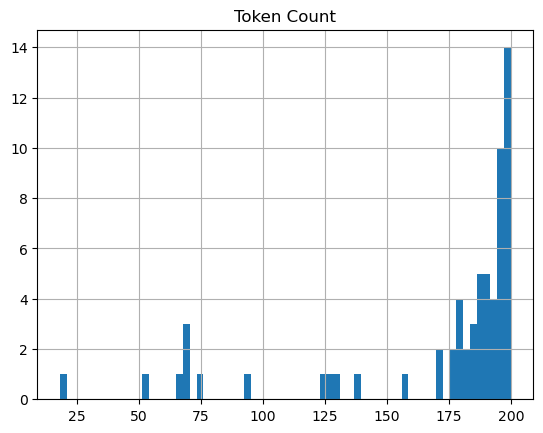

In [24]:
# Quick data visualization to ensure chunking was successful

# Create a list of token counts
token_counts = [count_tokens(chunk.page_content) for chunk in docs]

# Create a DataFrame from the token counts
df = pd.DataFrame({'Token Count': token_counts})

# Create a histogram of the token count distribution
df.hist(bins=66, )

# Show the plot
plt.show()

- **Split by pages**: If your data comes from documents organized in pages, there are methods that allow you to split data in pages to keep track of the page content. This method is specially useful when dealing with PDFs, as in the following example:

In [29]:
# Simple method - Split by pages    ________________________________________________________________________
# You need a PDF file in your environement. 
loader = PyPDFLoader(r"C:\Users\28263\Downloads\Docs\attentions.pdf")
pdf_pages_chunks = loader.load_and_split()
pdf_pages_chunks

print("\nSPLITTING BY PAGES")
print("PDF Splited by Pages - You have {0} number of chunks.".format(len(pdf_pages_chunks)))


SPLITTING BY PAGES
PDF Splited by Pages - You have 16 number of chunks.


# Vector Store:

FAISS - LOCAL 

In [31]:
from langchain.vectorstores import FAISS  # for the vector database part -- FAISS is local and temporal, Pinecone is cloud-
from langchain.embeddings.openai import OpenAIEmbeddings

# Get embedding model
embeddings = OpenAIEmbeddings()

# OPTION 1: FAISS (Facebook AI Similarity Search) Local _______________________________________________________________________________________
# Create vector database
db_FAISS = FAISS.from_documents(docs, embeddings)



# PINECONE

In [37]:
pip install pinecone-client

Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install pinecone-client==3.0.0

     -------------------------------------- 199.9/199.9 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: pinecone-client
    Found existing installation: pinecone-client 2.2.4
    Uninstalling pinecone-client-2.2.4:
      Successfully uninstalled pinecone-client-2.2.4
Note: you may need to restart the kernel to use updated packages.


In [1]:
from pinecone import Pinecone, ServerlessSpec, PodSpec
# OPTION 2: PINECONE Online
import time
from openai import OpenAI
import time
import os

#from langchain_pinecone import PineconeVectorStore

use_serverless = False




# res = client.embeddings.create(
#     input=[
#         "Sample document text goes here",
#         "there will be several phrases in each batch"
#     ], model=MODEL
# )

# # we can extract embeddings to a list
# embeds = [record.embedding for record in res.data]
# len(embeds)
pinecone_api_key = os.getenv('PINECONE_API_KEY')

index_name = 'chatpdf' 


# configure client
pc = Pinecone(api_key=pinecone_api_key)

if use_serverless:
    spec = ServerlessSpec(cloud='aws', region='us-west-2')
else:
    # if not using a starter index, you should specify a pod_type too
    spec = PodSpec(pod_type='starter', environment='gcp-starter')

# check for and delete index if already exists

if index_name in pc.list_indexes().names():
    pc.delete_index(index_name)

# create a new index
pc.create_index(
    index_name,
    dimension=1536,  # dimensionality of text-embedding-ada-002
    metric='cosine',
    spec=spec
)

# wait for index to be initialized
while not pc.describe_index(index_name).status['ready']:
    time.sleep(1)
#Target the index and check its current stats:


index = pc.Index(index_name)
index.describe_index_stats()

{'dimension': 1536,
 'index_fullness': 0.0,
 'namespaces': {},
 'total_vector_count': 0}

In [12]:
embeddings = OpenAIEmbeddings()



In [14]:

from langchain_pinecone import PineconeVectorStore

os.environ['PINECONE_API_KEY'] = '6e088a7e-2194-4ec3-9bd7-3f94ec4a9765'


docsearch = PineconeVectorStore.from_documents(docs, embeddings, index_name=index_name)



In [41]:
print(docs[5].page_content)

sequence lengths, as memory constraints limit batching across examples. Recent work has achieved
significant improvements in computational efficiency through factorization tricks [ 21] and conditional
computation [ 32], while also improving model performance in case of the latter. The fundamental
constraint of sequential computation, however, remains.
Attention mechanisms have become an integral part of compelling sequence modeling and transduc-
tion models in various tasks, allowing modeling of dependencies without regard to their distance in
the input or output sequences [ 2,19]. In all but a few cases [ 27], however, such attention mechanisms
are used in conjunction with a recurrent network.
In this work we propose the Transformer, a model architecture eschewing recurrence and instead
relying entirely on an attention mechanism to draw global dependencies between input and output.
The Transformer allows for significantly more parallelization and can reach a new state of the art in


In [40]:
query = "What are transformers "
search = docsearch.similarity_search(query)
print(search[0].page_content)




The Transformer allows for significantly more parallelization and can reach a new state of the art in
translation quality after being trained for as little as twelve hours on eight P100 GPUs.
2 Background
The goal of reducing sequential computation also forms the foundation of the Extended Neural GPU
[16], ByteNet [ 18] and ConvS2S [ 9], all of which use convolutional neural networks as basic building
block, computing hidden representations in parallel for all input and output positions. In these models,
the number of operations required to relate signals from two arbitrary input or output positions grows
in the distance between positions, linearly for ConvS2S and logarithmically for ByteNet. This makes
it more difficult to learn dependencies between distant positions [ 12]. In the Transformer this is
reduced to a constant number of operations, albeit at the cost of reduced effective resolution due


In [44]:
from langchain_openai import ChatOpenAI
from langchain.chains import RetrievalQA

from langchain.chains import RetrievalQAWithSourcesChain

query = 'What is transformer'
# completion llm
llm = ChatOpenAI(
    openai_api_key=os.environ['OPENAI_API_KEY'],
    model_name='gpt-3.5-turbo',
    temperature=0.0
)

qa = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=docsearch.as_retriever()
)

qa.invoke(query)

{'query': 'What is transformer',
 'result': 'The Transformer is a neural network architecture that is based entirely on attention mechanisms, dispensing with recurrence and convolutions. It is used for sequence transduction tasks, such as machine translation. The Transformer model allows for more parallelization, faster training times, and has shown superior performance compared to models based on recurrent or convolutional layers.'}

#With sources

In [45]:
from langchain.chains import RetrievalQAWithSourcesChain

qa_with_sources = RetrievalQAWithSourcesChain.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=docsearch.as_retriever()
)

qa_with_sources(query)

{'question': 'What is transformer',
 'answer': 'A transformer is a network architecture based solely on attention mechanisms, dispensing with recurrence and convolutions entirely. It is used for sequence transduction models and has shown superior quality in machine translation tasks.\n',
 'sources': 'C:\\Users\\28263\\Downloads\\Docs\\attentions.pdf'}

# 6. Clean up
When you no longer need the index, use the delete_index operation to delete it:



In [ ]:
pc.delete_index(index_name)


### Now upsert the data to Pinecone:



In [2]:

from langchain.document_loaders import PyPDFLoader, PyPDFDirectoryLoader
loader = PyPDFLoader(r"C:\Users\28263\Downloads\Docs\attentions.pdf")
pdf_data = loader.load()

from langchain.text_splitter import RecursiveCharacterTextSplitter 
# 2 - Tokenizer
from transformers import GPT2TokenizerFast  

# 3 - Create function to count tokens
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")

def count_tokens(text: str) -> int:
    return len(tokenizer.encode(text))

# 4 - Define the splitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size      = 200, 
    chunk_overlap   = 20,
    length_function = count_tokens # It uses len() by default. 
)

# 5 - Apply the .split_document command
docs = text_splitter.split_documents(pdf_data)
print("PDF Data - Now you have {0} number of chunks.".format(len(pdf_data)))





PDF Data - Now you have 15 number of chunks.


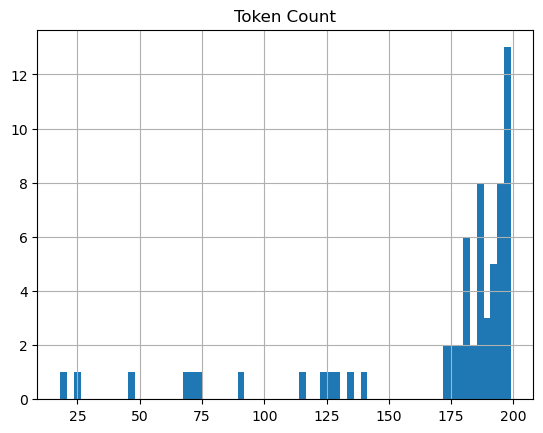

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a list of token counts
token_counts = [count_tokens(chunk.page_content) for chunk in docs]

# Create a DataFrame from the token counts
df = pd.DataFrame({'Token Count': token_counts})

# Create a histogram of the token count distribution
df.hist(bins=66, )

# Show the plot
plt.show()

In [10]:
from langchain_pinecone import PineconeVectorStore

pinecone_api_key = '6e088a7e-2194-4ec3-9bd7-3f94ec4a9765'
pc = Pinecone(pinecone_api_key)  
docsearch = PineconeVectorStore.from_documents(docs, embeddings, index_name=index_name)

vectorstore = PineconeVectorStore(
    index, embeddings, text_field = "text"

)


PineconeConfigurationError: You haven't specified an Api-Key.